### PIA 
Equipo 10

Grupo: 002 (miércoles 7:00 p.m. a 10:00 p.m.)

Integrantes:

 * 1811917 TREJO RODRIGUEZ EVELYN LIZBETH
 * 1815330 RODRIGUEZ ORTIZ MAGDALY
 * 1887948 ALEXIS HERNANDEZ MORALES


#### 1) Título de la base de datos:

#####      Sanfranciso Crime Dataset

#### 2) Descripción de los datos

a) Descripción breve de la base de datos. Esta descripción es en
formato de texto, no más de dos párrafos.

Es un conjunto de datos organizados por tablas que contiene información sobre los crímenes registrados por departamento de policía de la ciudad de San Francisco en el año 2016. 

El archivo contiene la información sobre las tasas de criminalidad en diferentes regiones de San Francisco con algunos otros aspectos importantes relacionados con la delincuencia, como la hora, lugar, fecha, descripción y resolución del suceso.

b) Con las herramientas vistas en clase, hacer una descripción de la
base de datos en cuanto a las columnas, tipo de dato, tamaño de la
base, etc.

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import folium

In [2]:
df = pd.read_csv("C:/Users/usuario/OneDrive - uanl.edu.mx/Desktop/FCFM/7mo SEMESTRE/MINERIA DE DATOS/Base de datos_Crimenes SF.csv",encoding='utf8')

In [3]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200580e+13
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200580e+13
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",1.410590e+13
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 00:00,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",1.600140e+13
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 00:00,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",1.600030e+13


In [4]:
df.shape

(150500, 13)

##### Tamaño de la base de datos:
A través de esta función, podemos observar de la cantidad de columnas y filas de nuestra base de datos original.
* Columnas: 13
* Filas: 150,500

In [5]:
df.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')

In [6]:
df.dtypes

IncidntNum      int64
Category       object
Descript       object
DayOfWeek      object
Date           object
Time           object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
Location       object
PdId          float64
dtype: object

##### Descripción de las columnas:

* IncidntNum: el número de incidente es de tipo entero de 64 bits.
* Category: describe la categoría del delito, es de tipo objeto, es decir, una secuencia de caracteres.
* Descript: descripción del crimen, ya sea un robo, asalto, fraudes, es de tipo objeto, es decir, una secuencia de caracteres.
* DayOfWeek: el día de la semana en el que ocurrió el delito es de tipo objeto, es decir, una secuencia de caracteres.
* Date: la fecha precisa (dd/mm/aaaa) en la que sucedió el crimen es de tipo objeto, es decir, una secuencia de caracteres.
* Time: la hora exacta en la que se reportó el crimen es de tipo objeto, es decir, una secuencia de caracteres.
* PdDistrict: el distrito del departamento de policía donde se reportó el crimen es de tipo objeto, es decir, una secuencia de caracteres.
* Resolution: el tipo de castigo que recibe el autor del crimen es de tipo objeto, es decir, una secuencia de caracteres.
* Address: la dirección precisa donde ocurrió la escena del crimen es de tipo objeto, es decir, una secuencia de caracteres.
* X: la latitud de la locación del crimen es de tipo flotante de 64 bits.
* Y: la longitud de la locación del crimen es de tipo flotante de 64 bits.
* Location: las coordenadas exactas donde sucedió el crimen es de tipo objeto, es decir, una secuencia de caracteres.
* PdId: el ID del departamento de policía que tomó el crimen es de tipo flotante de 64 bits.

In [7]:
df.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    1
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

Como podemos observar la cantidad de datos válidos en cada una de las columnas de nuestra base de datos es de 150,500 excepto en la columna PdDistrict, que cuenta con un dato nulo, esa columna cuenta con 150,499 datos válidos.

#### 3) Justificación del uso de datos.

a) ¿Cuáles fueron las características que les llamó la atención de los
datos?¿Qué les hizo querer trabajar con ellos?

Al encontrarnos con la base de datos, lo que más llamo nuestra atención no solo fueron los números como tal, si no el significado de cada uno de ellos y cómo repercutían en la población de cada uno de los distritos de San Francisco, así como también que los datos presentados eran más que suficientes para trabajar con la problemática que queríamos resolver.


b) Qué beneficio encuentran de trabajar con estos datos.

En lo concerniente al beneficio que encontramos al trabajar con dicha base de datos, principalmente es que una cantidad considerable de columnas de la misma nos proporciona información muy útil para nuestro objetivo; asimismo, es importante mencionar que el hecho de que nuestros datos están presentados por distritos, representa una mayor facilidad en el manejo de los elementos y a su vez, simplifica el proceso de obtención de resultados  para nuestra problemática.

#### 4) Mencionar los objetivos (Principal y secundarios).

Objetivo Principal:

Diseñar un método de clasificación para predecir de forma automática si un lugar específico en la ciudad de San Francisco será un centro de delincuencia o no, brindando al gobierno información útil para que tengan una mejor distribución de sus unidades policiacas, dado cierto día, hora y lugar; conocemos que la detección temprana de los lugares del delito es importante para que la ciudad de San Francisco pueda tomar decisiones preventivas que permitan aumentar la percepción de la seguridad pública. 

Sabemos que las actividades criminales se encuentran distribuidas aleatoriamente por toda la ciudad, sin embargo, realizando pruebas estadísticas y de visualización obtenemos que tienden a concentrarse en ciertos distritos por razones como escasez de vigilancia, etcétera, es decir, tienden a existir puntos calientes de crimen en donde el número de crímenes está por arriba del promedio, siendo zonas de interés para la prevención de los mismos.


a) Tomando en cuenta sus resultados con la parte de visualización y
estadística básica, pueden añadir objetivos secundarios. 

Objetivo Secundario:

Proveer información referente al porcentaje de casos sin resolución en cada uno de los departamentos de policía de los diferentes distritos de ciudad de San Francisco debido a la variabilidad que existe en estos datos entre los departamentos, siendo de interés para el gobierno la cantidad de criminales que no reciben ninguna sanción o no son arrestados por el departamento de policía, haciendo ver la poca eficacia de cada distrito para la resolución de ellos.

#### Desarrollo de las herramientas. (Requisitos)
##### 1. Siguiendo los pasos realizados en la práctica uno y dos, iniciar con la limpieza de los datos.

a) Mostrar los datos sin manipulación.

In [8]:
df

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200580e+13
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200580e+13
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",1.410590e+13
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 00:00,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",1.600140e+13
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 00:00,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",1.600030e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150495,161061000,ASSAULT,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01,PARK,NONE,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)",1.610610e+13
150496,176000742,NON-CRIMINAL,LOST PROPERTY,Friday,12/30/2016 12:00:00 AM,08:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,-122.401857,37.796626,"(37.7966261239618, -122.401857374739)",1.760010e+13
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/29/2016 12:00:00 AM,20:00,CENTRAL,NONE,PINE ST / TAYLOR ST,-122.412269,37.790673,"(37.7906727649886, -122.41226909106)",1.760010e+13
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Friday,12/30/2016 12:00:00 AM,10:00,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406659,37.788275,"(37.7882745285785, -122.406658711008)",1.760010e+13


b) Eliminar columnas no deseadas.

In [9]:
newbase = df.drop('IncidntNum',axis = 1 )

c) Correcta manipulación de los datos nulos dentro de la base de datos.

In [10]:
newbase_drop = newbase.dropna()

d) Cambiar nombre de cada columna

In [11]:
nbSF=newbase_drop.rename(columns = {'IncidntNum':'Numero_Incidente','Category':'Categoria_Crimen','Descript':'Descripcion','DayOfWeek':'Dia','Date':'Fecha','Time':'Hora_del_Crimen','PdDistrict':'Distrito_DepartamentoPolicia','Resolution':'Resolucion','Address':'Direccion','X':'Latitud','Y':'Longitud','Location':'Coordenadas','PdId':'ID_DepartamentoPolicia'})

Agrupaciones

In [12]:
nbSF.Distrito_DepartamentoPolicia.unique()

array(['SOUTHERN', 'BAYVIEW', 'TENDERLOIN', 'MISSION', 'NORTHERN',
       'TARAVAL', 'INGLESIDE', 'CENTRAL', 'RICHMOND', 'PARK'],
      dtype=object)

In [13]:
nbSF.Resolucion.unique()

array(['ARREST, BOOKED', 'NONE', 'JUVENILE BOOKED', 'ARREST, CITED',
       'UNFOUNDED', 'JUVENILE DIVERTED',
       'CLEARED-CONTACT JUVENILE FOR MORE INFO', 'EXCEPTIONAL CLEARANCE',
       'LOCATED', 'PSYCHOPATHIC CASE', 'COMPLAINANT REFUSES TO PROSECUTE',
       'NOT PROSECUTED', 'PROSECUTED BY OUTSIDE AGENCY', 'JUVENILE CITED'],
      dtype=object)

In [14]:
nbSF.Dia.unique()

array(['Friday', 'Monday', 'Tuesday', 'Saturday', 'Thursday', 'Sunday',
       'Wednesday'], dtype=object)

e) Cambiamos la resolución del crimen, por 0's y 1's

In [15]:
nbSF['Resolucion'] = nbSF['Resolucion'].str.replace(',','_')
nbSF['Resolucion'] = nbSF['Resolucion'].str.replace(' ','_')
nbSF['Resolucion'] = nbSF['Resolucion'].str.replace('-','_')

In [16]:
nbSF.Resolucion.replace(to_replace = dict(NONE= 0,UNFOUNDED=0,NOT_PROSECUTED=0,COMPLAINANT_REFUSES_TO_PROSECUTE=0), inplace = True)
nbSF.Resolucion.replace(to_replace = dict(ARREST__BOOKED = 1, EXCEPTIONAL_CLEARANCE = 1, JUVENILE_BOOKED=1,ARREST__CITED=1,PSYCHOPATHIC_CASE=1,LOCATED=1,CLEARED_CONTACT_JUVENILE_FOR_MORE_INFO=1,JUVENILE_DIVERTED=1,PROSECUTED_BY_OUTSIDE_AGENCY=1,JUVENILE_CITED=1), inplace = True)

f) Explicar a detalle entre cada línea de código la razón por la cual se decidió remover o modificar cada columna.

Al trabajar en la descripción de datos notamos que había cierta columna que no nos parecía útil, por lo que, procedimos a eliminarla, esta fue la columna con el nombre IncidntNum, la cual solamente nos representaba un folio de cada uno de los casos, este nos sería de gran utilidad en caso de querer información muy específica de algún caso, sin embargo, nos interesa tener una percepción más globalizada por distrito de la ciudad de San Francisco.

Proseguimos a eliminar los datos nulos ya que con ellos nuestra base de datos nos generaría espacio innecesario; nos percatamos que solo contenía un dato nulo y fue eliminada toda la fila que contenía dicho dato, este estaba presente en la columna de PdDistrict.

Ya que los encabezados de la base de datos se encontraban en un lenguaje inglés debido a la naturaleza de ella, sabemos que en algunos casos se podría dificultar el entender que representa la información, decidimos modificarles el nombre a cada uno de los encabezados.

Para poder manejar mejor nuestra base de datos decidimos otorgarle un número a los datos de la columna 'Resolucion', el número cero representaría los casos que no fueron resueltos y el número uno los que sí, pero para ello hicimos hincapié en encontrar los datos únicos de la columna para después clasificarlos en resueltos y no resueltos.

g) Crear un nuevo archivo con la base de datos editada.

In [17]:
nbSF.to_csv('NewBaseSanFrancisco.csv', index=False)

Guardar archivos con las agrupaciones.

In [18]:
DistTender = nbSF[nbSF['Distrito_DepartamentoPolicia']=='TENDERLOIN']
DistNorth = nbSF[nbSF['Distrito_DepartamentoPolicia']=='NORTHERN']
DistCentral = nbSF[nbSF['Distrito_DepartamentoPolicia']=='CENTRAL']
DistTara = nbSF[nbSF['Distrito_DepartamentoPolicia']=='TARAVAL']
DistSouth = nbSF[nbSF['Distrito_DepartamentoPolicia']=='SOUTHERN']
DistMission = nbSF[nbSF['Distrito_DepartamentoPolicia']=='MISSION']
DistPark = nbSF[nbSF['Distrito_DepartamentoPolicia']=='PARK']
DistBay = nbSF[nbSF['Distrito_DepartamentoPolicia']=='BAYVIEW']
DistIngle = nbSF[nbSF['Distrito_DepartamentoPolicia']=='INGLESIDE']
DistRich = nbSF[nbSF['Distrito_DepartamentoPolicia']=='RICHMOND']


DistTender.to_csv('Solo_DistTender.csv', index=False)
DistNorth.to_csv('Solo_DistNorth.csv', index=False)
DistCentral.to_csv('Solo_DistCentral.csv', index=False)
DistTara.to_csv('Solo_DistTara.csv', index=False)
DistSouth.to_csv('Solo_DistSouth.csv', index=False)
DistMission.to_csv('Solo_DistMission.csv', index=False)
DistPark.to_csv('Solo_DistPark.csv', index=False)
DistBay.to_csv('Solo_DistBay.csv', index=False)
DistIngle.to_csv('Solo_DistIngle.csv', index=False)
DistRich.to_csv('Solo_DistRich.csv', index=False)

##### 2. Estadística básica de los datos

a) Tomando en cuenta sus objetivos, inicia con algunos de los datos estadísticos básicos mostrados en la práctica 2.

##### Estadísticas Generales del estado de San Francisco

In [19]:
grouped_data = nbSF.groupby('Distrito_DepartamentoPolicia')

In [20]:
grouped_data.describe()

Resolucion                                     \
                                  count      mean       std  min  25%  50%   
Distrito_DepartamentoPolicia                                                 
BAYVIEW                         14303.0  0.284835  0.451352  0.0  0.0  0.0   
CENTRAL                         17666.0  0.210744  0.407848  0.0  0.0  0.0   
INGLESIDE                       11594.0  0.252113  0.434245  0.0  0.0  0.0   
MISSION                         19503.0  0.345075  0.475405  0.0  0.0  0.0   
NORTHERN                        20100.0  0.223035  0.416292  0.0  0.0  0.0   
PARK                             8699.0  0.236809  0.425148  0.0  0.0  0.0   
RICHMOND                         8922.0  0.166891  0.372899  0.0  0.0  0.0   
SOUTHERN                        28445.0  0.296361  0.456660  0.0  0.0  0.0   
TARAVAL                         11325.0  0.246799  0.431168  0.0  0.0  0.0   
TENDERLOIN                       9942.0  0.440656  0.496491  0.0  0.0  0.0   

                                        Latitud              ...   Longitud  \
                              75%  max    count        mean  ...        75%   
Distrito_DepartamentoPolicia                                 ...              
BAYVIEW                       1.0  1.0  14303.0 -122.393650  ...  37.753535   
CENTRAL                       0.0  1.0  17666.0 -122.409467  ...  37.803136   
INGLESIDE                     1.0  1.0  11594.0 -122.429507  ...  37.737435   
MISSION                       1.0  1.0  19503.0 -122.419508  ...  37.765050   
NORTHERN                      0.0  1.0  20100.0 -122.426955  ...  37.792384   
PARK                          0.0  1.0   8699.0 -122.445663  ...  37.775335   
RICHMOND                      0.0  1.0   8922.0 -122.473673  ...  37.783079   
SOUTHERN                      1.0  1.0  28445.0 -122.405254  ...  37.783992   
TARAVAL                       0.0  1.0  11325.0 -122.477893  ...  37.753752   
TENDERLOIN                    1.0  1.0   9942.0 -122.412540  ...  37.785123   

                                        ID_DepartamentoPolicia                \
                                    max                  count          mean   
Distrito_DepartamentoPolicia                                                   
BAYVIEW                       37.786658                14303.0  1.612838e+13   
CENTRAL                       37.808625                17666.0  1.620597e+13   
INGLESIDE                     37.760627                11594.0  1.612180e+13   
MISSION                       37.781924                19503.0  1.610880e+13   
NORTHERN                      37.807419                20100.0  1.620565e+13   
PARK                          37.787519                 8699.0  1.615933e+13   
RICHMOND                      37.819975                 8922.0  1.618720e+13   
SOUTHERN                      37.809671                28445.0  1.619366e+13   
TARAVAL                       37.766255                11325.0  1.616496e+13   
TENDERLOIN                    37.787765                 9942.0  1.611733e+13   

                                                                        \
                                       std           min           25%   
Distrito_DepartamentoPolicia                                             
BAYVIEW                       2.563580e+11  1.135120e+12  1.603070e+13   
CENTRAL                       6.827688e+11  1.302400e+13  1.603720e+13   
INGLESIDE                     2.365375e+11  1.207900e+13  1.602810e+13   
MISSION                       2.042106e+11  1.305510e+13  1.603130e+13   
NORTHERN                      3.219214e+11  1.602550e+12  1.603640e+13   
PARK                          2.567230e+11  1.301900e+13  1.603070e+13   
RICHMOND                      3.521115e+11  1.600360e+12  1.603530e+13   
SOUTHERN                      7.565020e+11  1.601010e+12  1.603500e+13   
TARAVAL                       2.675108e+11  8.107650e+12  1.603290e+13   
TENDERLOIN                    1.204379e+12  2.154670e+12 

In [21]:
ddist = pd.DataFrame({"Distrito": ['SOUTHERN', 'BAYVIEW', 'TENDERLOIN', 'MISSION', 'NORTHERN',
       'TARAVAL', 'INGLESIDE', 'CENTRAL', 'RICHMOND', 'PARK'],
                   "Cantidad_de_Crimenes_en_San_Francisco": [28445,14303,9942, 19503, 20100, 11325,11594,17666,8922,8699],})
ddist

,Distrito,Cantidad_de_Crimenes_en_San_Francisco
0,SOUTHERN,28445
1,BAYVIEW,14303
2,TENDERLOIN,9942
3,MISSION,19503
4,NORTHERN,20100
5,TARAVAL,11325
6,INGLESIDE,11594
7,CENTRAL,17666
8,RICHMOND,8922
9,PARK,8699


##### Promedio de crímenes en San Francisco:

In [22]:
ddist['Cantidad_de_Crimenes_en_San_Francisco'].mean()

15049.9

##### Desviación Estándar de crímenes en San Francisco:

In [23]:
ddist['Cantidad_de_Crimenes_en_San_Francisco'].std()

6341.731352276321

In [24]:
ddist['Cantidad_de_Crimenes_en_San_Francisco'].describe()

count       10.000000
mean     15049.900000
std       6341.731352
min       8699.000000
25%      10287.750000
50%      12948.500000
75%      19043.750000
max      28445.000000
Name: Cantidad_de_Crimenes_en_San_Francisco, dtype: float64

##### Crímenes totales en San Francisco 2016

In [25]:
total= ddist['Cantidad_de_Crimenes_en_San_Francisco'].sum()
total

150499

##### Porcentaje de crímenes correspondientes por distrito.

In [26]:
cri_sou=nbSF.groupby('Distrito_DepartamentoPolicia')['ID_DepartamentoPolicia'].count()['SOUTHERN']
meansou=cri_sou/total
cri_bay=nbSF.groupby('Distrito_DepartamentoPolicia')['ID_DepartamentoPolicia'].count()['BAYVIEW']
meanbay=cri_bay/total
cri_ten=nbSF.groupby('Distrito_DepartamentoPolicia')['ID_DepartamentoPolicia'].count()['TENDERLOIN']
meanten=cri_ten/total
cri_mis=nbSF.groupby('Distrito_DepartamentoPolicia')['ID_DepartamentoPolicia'].count()['MISSION']
meanmis=cri_mis/total
cri_nor=nbSF.groupby('Distrito_DepartamentoPolicia')['ID_DepartamentoPolicia'].count()['NORTHERN']
meannor=cri_nor/total
cri_tar=nbSF.groupby('Distrito_DepartamentoPolicia')['ID_DepartamentoPolicia'].count()['TARAVAL']
meantar=cri_tar/total
cri_ing=nbSF.groupby('Distrito_DepartamentoPolicia')['ID_DepartamentoPolicia'].count()['INGLESIDE']
meaning=cri_ing/total
cri_cen=nbSF.groupby('Distrito_DepartamentoPolicia')['ID_DepartamentoPolicia'].count()['CENTRAL']
meancen=cri_cen/total
cri_ric=nbSF.groupby('Distrito_DepartamentoPolicia')['ID_DepartamentoPolicia'].count()['RICHMOND']
meanric=cri_ric/total
cri_par=nbSF.groupby('Distrito_DepartamentoPolicia')['ID_DepartamentoPolicia'].count()['PARK']
meanpar=cri_par/total

In [27]:
pordis = pd.DataFrame({"Distrito": ['SOUTHERN', 'BAYVIEW', 'TENDERLOIN', 'MISSION', 'NORTHERN',
       'TARAVAL', 'INGLESIDE', 'CENTRAL', 'RICHMOND', 'PARK'],
                   "Porcentaje_de_Crimenes_por_Distrito ": [meansou,meanbay,meanten,meanmis,meannor,meantar,meaning,meancen,meanric,meanpar],})
pordis

,Distrito,Porcentaje_de_Crimenes_por_Distrito
0,SOUTHERN,0.189005
1,BAYVIEW,0.095037
2,TENDERLOIN,0.066060
3,MISSION,0.129589
4,NORTHERN,0.133556
5,TARAVAL,0.075250
6,INGLESIDE,0.077037
7,CENTRAL,0.117383
8,RICHMOND,0.059283
9,PARK,0.057801


#### Resolución

In [28]:
bay = pd.read_csv("C:/Users/usuario/OneDrive - uanl.edu.mx/Desktop/FCFM/7mo SEMESTRE/MINERIA DE DATOS/Solo_DistBay.csv",encoding='utf8')
central = pd.read_csv("C:/Users/usuario/OneDrive - uanl.edu.mx/Desktop/FCFM/7mo SEMESTRE/MINERIA DE DATOS/Solo_DistCentral.csv",encoding='utf8')
ingle = pd.read_csv("C:/Users/usuario/OneDrive - uanl.edu.mx/Desktop/FCFM/7mo SEMESTRE/MINERIA DE DATOS/Solo_DistIngle.csv",encoding='utf8')
south = pd.read_csv("C:/Users/usuario/OneDrive - uanl.edu.mx/Desktop/FCFM/7mo SEMESTRE/MINERIA DE DATOS/Solo_DistSouth.csv",encoding='utf8')
tender = pd.read_csv("C:/Users/usuario/OneDrive - uanl.edu.mx/Desktop/FCFM/7mo SEMESTRE/MINERIA DE DATOS/Solo_DistTender.csv",encoding='utf8')
mission = pd.read_csv("C:/Users/usuario/OneDrive - uanl.edu.mx/Desktop/FCFM/7mo SEMESTRE/MINERIA DE DATOS/Solo_DistMission.csv",encoding='utf8')
north = pd.read_csv("C:/Users/usuario/OneDrive - uanl.edu.mx/Desktop/FCFM/7mo SEMESTRE/MINERIA DE DATOS/Solo_DistNorth.csv",encoding='utf8')
tara = pd.read_csv("C:/Users/usuario/OneDrive - uanl.edu.mx/Desktop/FCFM/7mo SEMESTRE/MINERIA DE DATOS/Solo_DistTara.csv",encoding='utf8')
rich = pd.read_csv("C:/Users/usuario/OneDrive - uanl.edu.mx/Desktop/FCFM/7mo SEMESTRE/MINERIA DE DATOS/Solo_DistRich.csv",encoding='utf8')
park = pd.read_csv("C:/Users/usuario/OneDrive - uanl.edu.mx/Desktop/FCFM/7mo SEMESTRE/MINERIA DE DATOS/Solo_DistPark.csv",encoding='utf8')


In [29]:
b=bay['Resolucion'].mean()
c=central['Resolucion'].mean()
i=ingle['Resolucion'].mean()
so=south['Resolucion'].mean()
t=tender['Resolucion'].mean()
m=mission['Resolucion'].mean()
n=north['Resolucion'].mean()
ta=tara['Resolucion'].mean()
r=rich['Resolucion'].mean()
p=park['Resolucion'].mean()

In [30]:
porres = pd.DataFrame({"Distrito": ['SOUTHERN', 'BAYVIEW', 'TENDERLOIN', 'MISSION', 'NORTHERN',
       'TARAVAL', 'INGLESIDE', 'CENTRAL', 'RICHMOND', 'PARK'],
                   "Promedio_de_Crimenes_Resueltos": [so,b,t,m,n,ta,i,c,r,p],})
porres

,Distrito,Promedio_de_Crimenes_Resueltos
0,SOUTHERN,0.296361
1,BAYVIEW,0.284835
2,TENDERLOIN,0.440656
3,MISSION,0.345075
4,NORTHERN,0.223035
5,TARAVAL,0.246799
6,INGLESIDE,0.252113
7,CENTRAL,0.210744
8,RICHMOND,0.166891
9,PARK,0.236809


##### Promedio de Crímenes Resueltos en San Francisco:

In [31]:
nbSF['Resolucion'].mean()

0.2730117808091748

b) Explicar a detalle porque se utilizó cada uno de ellos, y
comentar los resultados al final. (¿Qué es lo que me dicen
estos datos con respecto a mis objetivos o planteamiento
del problema? Ej. Promedios, medias, máximos, etc.)

* Promedio de crímenes en San Francisco:

El estadístico de la media nos ayudará a tener una noción de la cantidad de crímenes que se esperan por cada distrito, verificando las frecuencias que sobrepasen o se mantengan por debajo de esta.


Podemos observar que la media es de 15049.9, por lo que distritos como SOUTHERN, MISSION, y NORTHERN cuentan con una frecuencia de crímenes mayor a lo esperado, dando indicios de posibles puntos calientes, de forma contraria los distritos de PARK, RICHMOND y TENDERLOIN tienen una incidencia menor a nuestra media pudiéndose considerar zonas más seguras.

* Desviación Estándar de crímenes en San Francisco:

Otro estadístico importante de calcular es la desviación estándar, ya que este nos indicará que tan alejados están nuestros incidentes respecto a la media de crímenes, en nuestro caso 6341.731352 se espera que varíe respecto a 15049.9 ya sea por encima o por debajo.

* Promedio de Crímenes Resueltos en San Francisco:

Al trabajar con crímenes en la ciudad de San Francisco creemos que es de gran importancia el saber el porcentaje de cuantos de esos casos son resueltos; al momento de realizar dicho estimador nos percatamos de que solamente el 0.2730 de los casos totales tienen un seguimiento eficaz, lo cual nos quiere decir que la mayor parte de los casos no son resueltos. 
Al realizar el mismo procedimiento, pero ahora por distrito, notamos que el el caso no es muy distinto y que la mayor parte de ellos tienen un porcentaje muy bajo de resolución, a excepción de TENDERLOIN, MISSION, SOUTHERN y BAYVIEW que sobrepasan a la media de resolución.

##### 3. Gráficas.

a) Tomen en cuenta los resultados de la estadística descriptiva
básica y realicen al menos 4 gráficas que les ayude a
entender mejor su base de datos.

c) Realizar conclusiones en cada una de las gráficas, y darles
cohesión entre ellas. Esto quiere decir, que dependiendo de
los resultados de la gráfica anterior, se hace la gráfica
siguiente.

Text(0.5, 1.0, 'Horario con la mayor cantidad de crimenes en San Francisco')

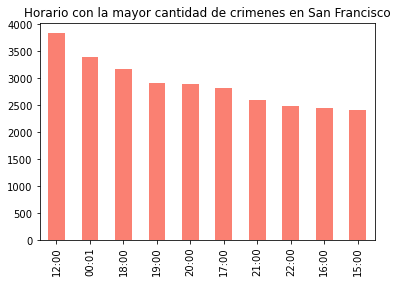

In [34]:
nbSF['Hora_del_Crimen'].value_counts().head(10).plot.bar(color="salmon")

plt.title("Horario con la mayor cantidad de crimenes en San Francisco")

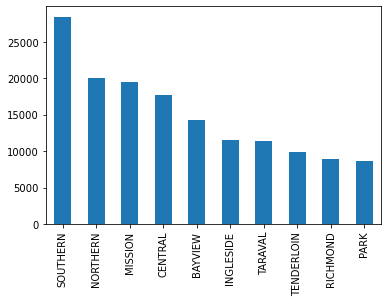

In [35]:
nbSF['Distrito_DepartamentoPolicia'].value_counts().plot.bar()

Analizando la gráfica anterior, la cual representa el número de casos por distrito, notamos que el que tiene más crímenes a finales del 2016 en San Francisco es SOUTHERN y el distrito con menos crímenes es PARK

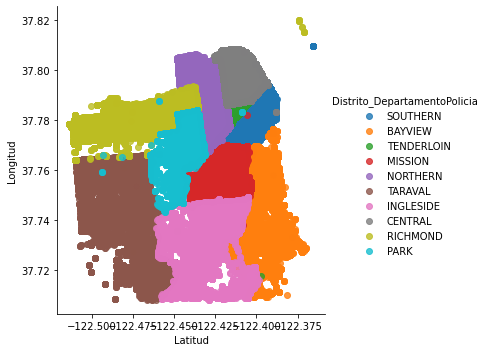

In [36]:

sns.lmplot(x='Latitud', y='Longitud', hue='Distrito_DepartamentoPolicia', 
           data=nbSF.loc[nbSF['Distrito_DepartamentoPolicia'].isin(['SOUTHERN', 'BAYVIEW', 'TENDERLOIN', 'MISSION', 'NORTHERN',
       'TARAVAL', 'INGLESIDE', 'CENTRAL', 'RICHMOND', 'PARK'])], 
           fit_reg=False)

Después de dichos resultados, podríamos suponer que SOUTHERN podría ser un distrito que abarca un gran espacio territorial y PARK todo lo contrario, pero al observar nuestra siguiente gráfica en la cual se muestran los crímenes (en distintos colores dependiendo de su distrito), que nuestros supuestos en realidad son totalmente lo contrario, y ahora, podemos pensar que el área que abarca cada distrito no es proporcional al número de casos de cada uno de ellos. 

In [52]:
!pip install folium


In [61]:
#Download San FranciscoCrime DataSet
sf_crime = pd.read_csv('C:/Users/usuario/OneDrive - uanl.edu.mx/Desktop/FCFM/7mo SEMESTRE/MINERIA DE DATOS/Base de datos_Crimenes SF.csv')
sf_crime.drop(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'], axis=1, inplace=True)
by_zone = sf_crime.apply(pd.Series.value_counts).reset_index()
by_zone.rename(columns={'index':'Neighborhood', 'PdDistrict':'Count'}, inplace=True)



# Download San Francisco district polygon GeoJSON



url = 'https://cocl.us/sanfran_geojson'
urllib.request.urlretrieve(url, 'sf_neighborhoods.json')
sf_zones = r'sf_neighborhoods.json'




# Define San Francisco Center point
sf_lat = 37.77
sf_lon = -122.42



#Create Folium Map
sf_crime_map = folium.Map(location = [37.75,-122.42], zoom_start=12)



#Create choropleth map with neighborhood polygon colored with crime metric
sf_crime_map.choropleth(
geo_data=sf_zones,
data=by_zone,
columns=['Neighborhood', 'Count'],
key_on='feature.properties.DISTRICT',
fill_color='YlOrRd',
fill_opacity=0.7,
line_opacity=1,
legend_name='San Fransisco Crime by Neighborhood'
)



folium.Marker(location = [37.75,-122.42], tooltip = 'MISSION').add_to(sf_crime_map)

folium.Marker(location = [37.77542071,-122.4034048], tooltip = 'SOUTHERN').add_to(sf_crime_map)

folium.Marker(location = [37.72998097,-122.3888562], tooltip = 'BAYVIEW').add_to(sf_crime_map)

folium.Marker(location = [37.75959493,-122.4822223], tooltip = 'TARAVAL').add_to(sf_crime_map)

folium.Marker(location = [37.78801856,-122.4260772], tooltip = 'NORTHERN').add_to(sf_crime_map)

folium.Marker(location = [37.72927052,-122.4323259], tooltip = 'INGLESIDE').add_to(sf_crime_map)
folium.Marker(location = [37.771428,-122.453982],tooltip = 'PARK').add_to(sf_crime_map)
folium.Marker(location = [37.796626,-122.401857],tooltip = 'CENTRAL').add_to(sf_crime_map)
folium.Marker(location = [37.771494,-122.507750],tooltip = 'RICHMOND').add_to(sf_crime_map)





#Plot map
sf_crime_map




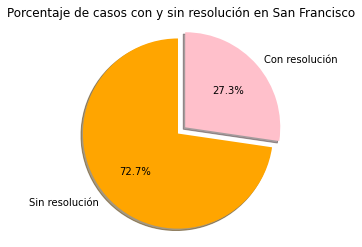

In [38]:
import matplotlib.pyplot as plt
labels = ['Sin resolución', 'Con resolución']
sizes = [109396,41103]
explode = (0,0.1)



fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90,colors=('orange', 'pink') )
ax1.axis('equal')
plt.title('Porcentaje de casos con y sin resolución en San Francisco')
plt.show()

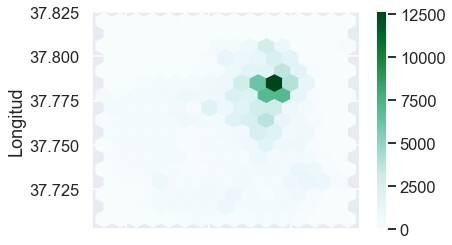

In [40]:
nbSF.plot.hexbin(x='Latitud', y='Longitud', gridsize=15)

Siguiendo con la misma lógica de la gráfica anterior procedimos a representar donde había más crímenes en toda la ciudad de San Francisco, pero ahora por coordenadas; en esta gráfica pudimos comprobar que el espacio que abarca SOUTHERN es el más riesgoso de toda la ciudad ya que ningún otro punto tuvo una concentración grande de crímenes.

Para finalizar con el estudio de los datos decidimos realizar una gráfica de casos por hora, ya que si los casos como vimos anteriormente, se concentraron en alguna zona, tal vez se concentrarían en un horario en específico también, observando dicha gráfica pudimos apreciar una diferencia significativa en la frecuencia de los delitos los cuales toman lugar mayormente a las doce del medio día y las doce de la media noche.

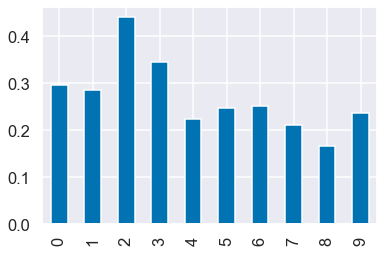

In [41]:
porres['Promedio_de_Crimenes_Resueltos'].plot.bar()

0	SOUTHERN /
1	BAYVIEW	/
2	TENDERLOIN /
3	MISSION	/
4	NORTHERN /
5	TARAVAL /
6	INGLESIDE /
7	CENTRAL /
8	RICHMOND /
9	PARK 

En nuestro objetivo secundario nos interesa la resolución de los casos por cada departamento de policia, por lo que decidimos verificarlo mediante un gráfico en donde nos percatamos que el porcentaje de crímenes que cuentan con una sentencia varía dependiendo el distrito en donde se encuentra el departamento, siendo TENDERLOIN el que tiene un mayor porcentaje de casos con resolución y RICHMOND el que tiene el menor porcentaje.

b) Revisen si en esta etapa pueden empezar a concluir cosas
de sus objetivos y planteamiento del problema. (NOTA:
Estas conclusiones pueden probar no ser ciertas al finalizar,
lo que me interesa es ver mas o menos como van
estructurando sus propias teorías)

Respecto a lo visualizado anteriormente, podemos suponer que SOUTHERN será uno de nuestros puntos calientes y muy posiblemente el más intenso de todos, aún siendo uno de los distritos con menos extensión territorial; esto hay que tenerlo muy presente al momento de realizar la distribución de las unidades policiacas del distrito ya que, siendo este tan pequeño y distribuyendo a cada una de las unidades en horarios distintos, los crímenes se podrían ver reducidos en un gran porcentaje.
Otro punto a considerar al momento de realizar los horarios en los cuales las unidades policiacas harán sus rondines es que la mayoría de los crímenes suceden a las doce del medio día y a las doce de la madrugada, por lo cual es indispensable tener cubierto la mayor parte del área de la ciudad de San Francisco en dichos horarios, esto para atacar nuestra problemática principal.

d) Realizar una conclusión global al finalizar el avance. Revisar
si ya pueden responder alguno de sus objetivos y comentar
si cambiaron sus estrategias para darle uso a su base de
datos.

##### Conclusión Global

Para finalizar podemos concluir que el adecuar la base de datos a nuestras necesidades no fue una tarea difícil, y esto nos ayudó a simplificar el desarrollo de nuestra problemática; ya lista la información de los crímenes en San Francisco en el año del 2016 decidimos realizar estadísticos con los datos más relevantes para identificar la gravedad de nuestra problemática. Ya obtenidos dichos indicadores, nos percatamos de que, ya que la media anual por distrito es de 15,049.9 , cuatro de los diez distritos presentan un número de incidentes por encima de la misma, por lo cual se podría pensar que los puntos calientes estarían cerca de esas áreas; pudimos comprobar a través de una gráfica de densidad que SOUTHERN uno de los distritos con casos por encima de la media, es un punto caliente en la ciudad. Esto nos presenta focos rojos para este lugar, ya que también pudimos observar en una gráfica que el área que abarca dicho distrito no es extensa, sin embargo, es el lugar con más casos en las zonas de San Francisco, por lo que podríamos redistribuir las unidades policiacas que laboran en esa área para una óptima distribución en tiempo y espacio; hablamos también de tiempo ya que gracias a una de las gráficas realizadas nos percatamos de que el horario en el que más crímenes ocurren en la ciudad de San Francisco son las doce del medio día y las doce de la madrugada.

Por último, para nuestro objetivo secundario, gracias a la última gráfica y las estadísticas obtenidas podemos observar que respecto a la media de crímenes resueltos que fue de 0.273, RICHMOND resuelve solo un 0.166891, siendo un distrito en el cual habría que hacer un enfoque a la manera de como se están llevando a cabo los casos. Con esta información podemos comenzar a responder a nuestro objetivo principal y secundario, sobre el cual ya nos percatamos en que distrito necesita el gobierno poner más vigilancia y en que horario, y además concentrarse o investigar el distrito en el que menos se resuelven casos.